<a href="https://colab.research.google.com/github/HarshGujarathi7/GISTEST/blob/main/ps1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Resaerch Intesrest**

In this Project ,
I am working on mapping the co-relation betwween crimes that are commited in India at a district level and the Wealtj/Income of each district and showing how each other go hand in hand

aok: cool great topic; do make sure though data are decently representative of the districs; think about quality of the data and margins of error; and ideally see if can traingulate--use multiple measures to measure the same concept:

https://researchmethod.net/triangulation/

https://conjointly.com/kb/measurement-error/

## **Data Set**


Data i used have been taken online from various sites .


*   This data set is for the income and wealth of each district-https://secc.in/getSeccDataSummaryNationalReport.htmgov.

* This dataset contains the crime statistics of the districts of India - https://data.gov.in/resource/district-wise-crime-under-various-sections-indian-penal-code-ipc-crimes-during-2001-2012







## **Importing Libraries**

In [1]:
import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

**Install Geopandas**

In [2]:
#! pip install geopandas
#!pip install mapclassify
import geopandas as gpd
#import mapclassify

## mapping your area of interest

In this we are mapping the shapefile of India .

*   We have provided the link of the zip file which is present in my repository and we are Plotting it
*   In the code we first find the zip file , then unzip the zip file and find the shape file of india ,then we plot the india shapefile







In [3]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O india_states.zip https://github.com/HarshGujarathi7/GISTEST/raw/main/district.zip

zip_ref = zipfile.ZipFile('india_states.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
india=gpd.read_file('output.shp') #load the shapefile with gpd as india

<Axes: >

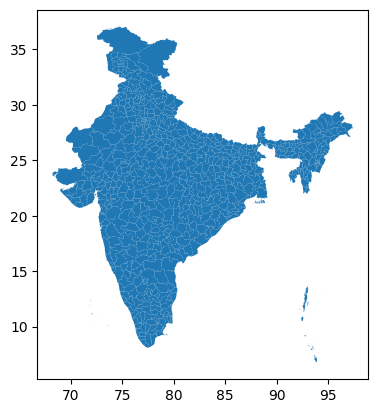

In [4]:
#make the map
india.plot()

The above map plots the district and India map borders

# **Data Types and columns in the shapefile**

In [5]:
india.dtypes #with geopandas can do stuff like with pandas :)


objectid         int64
statecode       object
statename       object
state_ut        object
distcode        object
distname        object
distarea       float64
totalpopul     float64
totalhh        float64
totpopmale     float64
totpopfema     float64
st_areasha     float64
st_lengths     float64
geometry      geometry
dtype: object

In [6]:
india.columns

Index(['objectid', 'statecode', 'statename', 'state_ut', 'distcode',
       'distname', 'distarea', 'totalpopul', 'totalhh', 'totpopmale',
       'totpopfema', 'st_areasha', 'st_lengths', 'geometry'],
      dtype='object')

In [7]:
india.describe

<bound method NDFrame.describe of      objectid statecode    statename state_ut distcode      distname  \
0           1        05  Uttarakhand    STATE      066      Nainital   
1           2        05  Uttarakhand    STATE      060      Dehradun   
2           3        05  Uttarakhand    STATE      064        Almora   
3           4        05  Uttarakhand    STATE      065     Champawat   
4           5        05  Uttarakhand    STATE      056    Uttarkashi   
..        ...       ...          ...      ...      ...           ...   
688       691        36    Telangana    STATE      T28    Wanaparthy   
689       692        36    Telangana    STATE      T27     Vikarabad   
690       693        36    Telangana    STATE      T13  Mahabubnagar   
691        41        01       Ladakh    STATE      004        Kargil   
692        34        01       Ladakh    STATE      003  Leh (Ladakh)   

     distarea  totalpopul   totalhh  totpopmale  totpopfema    st_areasha  \
0      4251.0    954605.

In [11]:
india_1 = india[["distname", "statename","distarea","totalpopul",]]

In [12]:
india_1.head(2)

,distname,statename,distarea,totalpopul
0,Nainital,Uttarakhand,4251.0,954605.0
1,Dehradun,Uttarakhand,3088.0,1696694.0


## mapping var from data file

In [ ]:
# say want to map housing values across nj counties; first need to get the map with counties
# (then we will get regular data with housing values and merge with counties data and color code the polygons)
# maps have their own files, a popular one is 'shapefile', so if you want to map nj counties
# first step is to get the geo data so google 'geography you're looking for + 'shapefile'', eg 'nj counties shapefile'
# i found one and put on my website
# have it zipped--one shapefile consists of several files--keep them in one zipped folder and dont change their names
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download
zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC=gpd.read_file('nj_counties.shp') #load the shapefile with gpd as njC

In [ ]:
india.dtypes #with geopandas can do stuff like with pandas :)

In [ ]:
njC.head(2)

In [ ]:
njC.plot() #yay love the shape

In [ ]:
#sometimes lucky and have the variable we want to map in the shapefile
njC.plot(figsize=(10,12),column='POPDEN2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}"}) #,ax=ax

In [ ]:
# we can overlay layers; lets get nj uni shapefile on it
!wget -q -O col.zip  https://docs.google.com/uc?id=1bb9KES6QDE7cleE4L38yQ7939LlXUHB5&export=download
zip_ref = zipfile.ZipFile('col.zip', 'r');zip_ref.extractall(); zip_ref.close()

col = gpd.read_file('2007_11_30_NJ_COLL_UNIV_njsp.shp')
#col.dtypes

fig, ax = plt.subplots(1, figsize=(6,10))
njC.plot(ax=ax, color='white', edgecolor='black',linewidth=1)
col.plot(ax=ax, marker='o', color='red', markersize=10)
#col.plot(column='ENROLL',markersize=50,legend=True,cmap='RdYlGn_r',scheme='QUANTILES',k=5,ax=ax)
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#ax.set_title('Watersheds by area ($mi^2$)')

In [ ]:
#ok that was fun but remember we want to map housing prices
#but we dont have that info in counies shapefile :(
#so we need to find it elsewhere...and...merge!
#2nd dataset:  housing prices
!wget -q -O zillow.csv  https://docs.google.com/uc?id=1Q4tCZT0EfaJP_WGwKcxuPaQ_dDFonW4E&export=download
zillow=pd.read_csv('zillow.csv')
zillow.head(3)
zil1=zillow[['UPPER','Dec 2012']]
zil1.rename(columns={'UPPER': 'COUNTY'}, inplace=True) #fix col names to match 1st dataset

In [ ]:
#merge
njC1 = pd.merge(njC, zil1, on='COUNTY',how='outer',indicator=True)
njC1[['COUNTY','Dec 2012','POPDEN2010','_merge']] #all good, NEW JERSEY expected not to merge
njC2 = pd.merge(njC, zil1, on='COUNTY',how='inner',indicator=False)

In [ ]:
njC2.plot(figsize=(10,12),column='Dec 2012',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}"})

#### abortions example
(make sure to have njC shapefile from previous sec)

In [ ]:
# get data: https://data.guttmacher.org/ has a nice API
# can click thru to get the table we want, which results in url (can open in webbrowser):
# https://data.guttmacher.org/counties/table?county=34001+34003+34005+34007+34009+34011+34013+34015+34017+34019+34021+34023+34025+34027+34029+34031+34033+34035+34037+34039+34041&topics=244+247&dataset=data&state=NJ
# and then can right click on 'download xls' (csv is messy in this case) button under the table and 'copy link address' and paste into wget (need quotes!):
!wget -q -O njAb.xls  "https://data.guttmacher.org/download?locationType=county&visualization=datatable&topic=244+247&locations=34001+34003+34005+34007+34009+34011+34013+34015+34017+34019+34021+34023+34025+34027+34029+34031+34033+34035+34037+34039+34041&measures=424+425+426+427+428+429+436+437+438+439+440+441+442&totalKey=NJ"

In [ ]:
# alternatively can scrap the table
#import requests
#url = 'https://data.guttmacher.org/counties/table?county=34001+34003+34005+34007+34009+34011+34013+34015+34017+34019+34021+34023+34025+34027+34029+34031+34033+34035+34037+34039+34041&topics=244+247&dataset=data&state=NJ'
#header = {
#  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
#  "X-Requested-With": "XMLHttpRequest"
#}
#r = requests.get(url, headers=header)
#pd.read_html(r.text,match='U.S. County',flavor=None)[0].head(3) #for match just putting name of first col

In [ ]:
njAb=pd.read_excel('njAb.xls')
njAb.head(3)

In [ ]:
#look at shapefile col names
njC

In [ ]:
njC['U.S. County']=njC['COUNTY_LAB'].str.replace(' County','') #get rid of ' County' [note space in front of county]
njC.head(5)

In [ ]:
njCAb = pd.merge(njC, njAb, on='U.S. County',how='outer',indicator=True)
njCAb.head(50) # ok fine just junk from the bottom like sources etc and NJ as state didnt merge, so can do clean inner merge

In [ ]:
njCAb = pd.merge(njC, njAb, on='U.S. County',how='inner',indicator=True) #inner merge
njCAb

In [ ]:
njCAb.dtypes

In [ ]:
#need to convert string (object) to numeric (float or int; float is safer can have decimals if needed)
njCAb['publicly funded clinics, 2015'] = njCAb['Total publicly funded clinics, 2015 [1]'].astype(float)

In [ ]:
njCAb[['U.S. County','Total publicly funded clinics, 2015 [1]','publicly funded clinics, 2015']]

In [ ]:
fig, ax = plt.subplots(figsize=(6,10))

njCAb.plot(ax=ax,figsize=(10,12),column='publicly funded clinics, 2015',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}"})
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('count of publicly funded abortion clinics, 2015')
#ax.annotate('Note added to chart with minimum parameters', xy = (200000, 1000))
plt.figtext(0.5, 0.1,
            '''data from guttmacher.org
            Publicly Funded Contraceptive Services at U.S. Clinics, 2015, Frost JJ, et al., 2017''',
            ha="center", fontsize=8, #bbox={"facecolor":"white", "alpha":0.5, "pad":5}
            )

# TODO expand massively on geopandas all bells and whistles
TODO do a bit of pandas for dat man like reading in data and looking at it!!


## notes to myself

the whole course, geo dat sci:
https://darribas.org/gds_course/content/home.html

LATER:
 basemap! guess the first one! used to use it, but dead, depreciated in favor of cartopy
https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html